## [1] Método de Euler via planilha eletrônica

Considere a equação diferencial para um corpo em queda livre com resistência do ar: 

$$\frac{dv}{dt} = -g - \frac{b}{m} v$$ 

onde $g$ é a aceleração da gravidade, $b$ é o coeficiente de arrasto, e $m$ é a massa do corpo. A equação acima é uma equação diferencial de condição inicial (IVP = initial value problem).

Considere $g = 9.8$ m/s², $b = 0.1$ kg/s, e $m = 1$ kg. A condição inicial é $v(0) = 0$ m/s.

### Atividades mínimas: 65 pts

- 1a. Considerando que o tempo avança em passos discretos na forma de $t_n = n \Delta t$, sendo $\Delta t$ o passo temporal, use o método de Euler para obter a formula iterativa para a velocidade no instante $t_{n+1}$ em termos dos dados em $t_n$: 

$$ v_{n+1} = v_n + \left(-g - \frac{b}{m} v_n\right)\Delta t $$

- 1b. Usando $\Delta t = 0.1$ s, faça uma tabela no Excel com os valores de $t_n$ e $v_n$ para $n=0, 1, \ldots, 100$. Use a fórmula de Euler para calcular $v_{n+1}$ a partir de $v_n$ iterativamente no Excel ou outras planilhas eletrônicas equivalentes.

- 1c. Usando as duas colunas obtidas no item anterior, use as funções gráficas da planilha eletrônica para fazer um gráfico de $v_n$ em função de $t_n$. Verifique se a velocidade terminal atinginda bate com o valor esperado.



### Atividades intermediárias: 20 pts

- 1d. Refaça o mesmo problema acima, mas agora em python usando arrays do `numpy` para armazenar $t_n$ e $v_n$ e `matplotlib` para os gráficos.


In [44]:
import numpy as np

def MetodoDeEuler(dt,n,t0,y0):

    # Definindo a função f(t,y)
    def f(t, y):

        return (-9.8-(0.1)*y)*t

    # Inicializando os arrays
    t = []
    y = []

    # Condições iniciais
    t.append(t0)
    y.append(y0)

    # Método de Euler
    for i in range(n):
        t.append(t[i] + dt)
        y.append(y[i] + dt*f(t[i], y[i]))

    return t, y
t ,y = MetodoDeEuler(0.1, 200, 0, 0)
np.savez('euler', t=t, y=y)

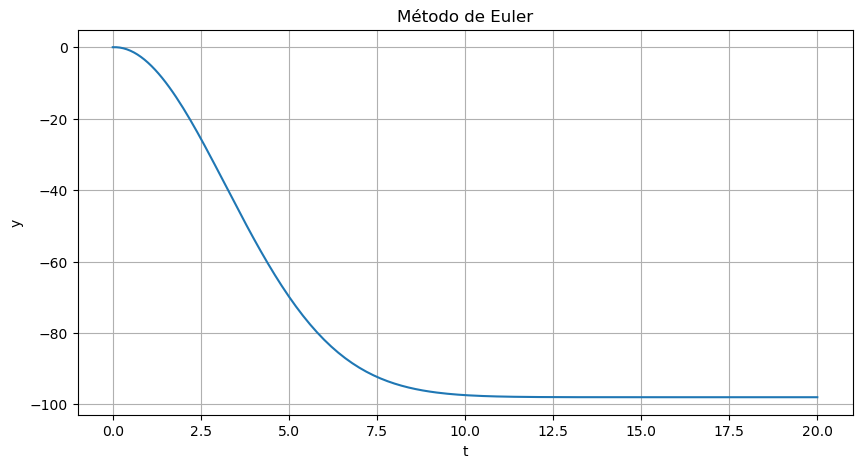

In [49]:
import matplotlib.pyplot as plt

# Carregando os dados
data = np.load('euler.npz')
t = data['t']
y = data['y']
# Plotando os resultados
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t, y)
ax.set_title('Método de Euler')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid()
plt.show()

In [42]:
import numpy as np

def RK4(dt, n, t0, y0):

    # Definindo a função f(t,y)
    def f(t, y):
        return (-9.8-(0.1)*y)*t

    # Inicializando os arrays
    t = []
    y = []

    # Condições iniciais
    t.append(t0)
    y.append(y0)

    # Método de Runge-Kutta de 4ª ordem
    for i in range(n):
        t.append(t[i] + dt)
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i] + k1/2)
        k3 = dt * f(t[i] + dt/2, y[i] + k2/2)
        k4 = dt * f(t[i] + dt, y[i] + k3)
        y.append(y[i] + (k1 + 2*k2 + 2*k3 + k4)/6)

    return t, y
t, y = RK4(0.1, 200,0, 0)
np.savez('rk4', t=t, y=y)

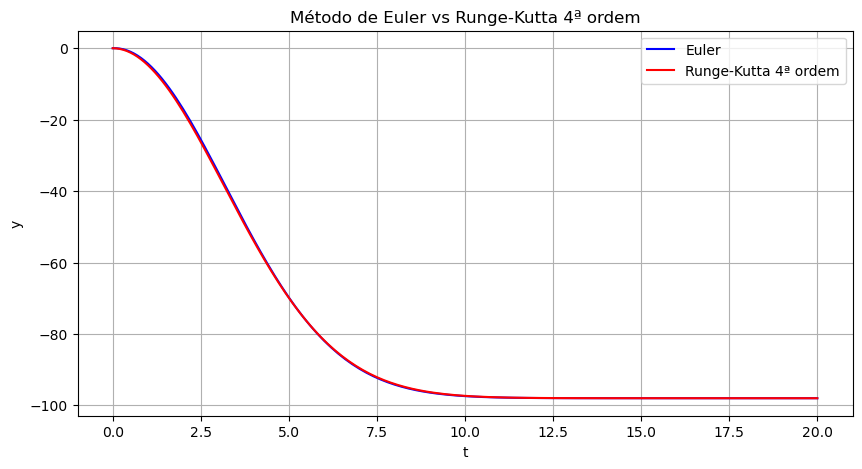

In [ ]:
import matplotlib.pyplot as plt


# Carregando os dados
data1 = np.load('euler.npz')
data = np.load('rk4.npz')
t1 = data1['t']
y1 = data1['y']
t = data['t']
y = data['y']
# Plotando os resultados
fig, ax = plt.subplots( figsize=(10,5))

ax.plot(t1, y1, label='Euler',color='blue')
ax.plot(t, y, label='Runge-Kutta 4ª ordem',color='red')
ax.set_title('Método de Euler vs Runge-Kutta 4ª ordem')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid()
ax.legend()
plt.show()

## Oscilador harmônico

Considere a EDO do oscilador harmônico amortecido:

 ${{d²x} \over dt²} = − ω²x − b{{dx} \over dt}$ 

Esta é uma EDO de segunda ordem, mas os métodos de Euler e RK4 são feitos para EDOs de primeira ordem. Para resolver este impasse, temos duas opções: redução de ordem ou método de Verlet

${v = {dx \over dt}}$ 

${{dv \over dt} = -w²x -bv}$

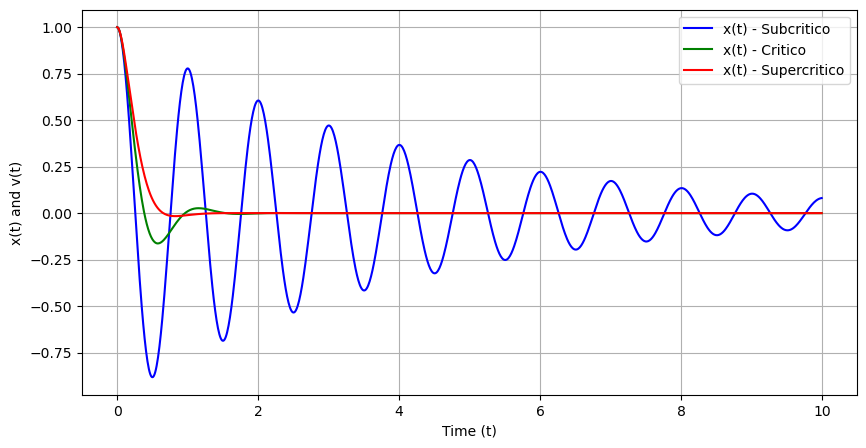

In [ ]:

import numpy as np
import scipy.integrate as spi

def f(t, yv, b):
    y, v = yv
    dy = v
    dv = -((2 * np.pi)**2) * y - b * v
    return [dy, dv]

def solve_and_plot(b, label, color):
    result = spi.solve_ivp(f, (0, 10), [1, 0], t_eval=np.arange(0, 10, 0.01), args=(b,))
    
    t = result.t
    y = result.y[0]  # y
    v = result.y[1]  # v
    
    ax.plot(t, y, label=f'x(t) - {label}', color=color)
    #ax.plot(t, v, label=f'v(t) - {label}', linestyle='--', color=color)
   


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Time (t)')
ax.set_ylabel('x(t) and v(t)')
ax.grid() 

# (b < 2 )
solve_and_plot(0.5, 'Subcritico', 'blue')

# (b = 2 )
solve_and_plot(2*np.pi, 'Critico', 'green')

# (b > 2 )
solve_and_plot(10, 'Supercritico', 'red')

ax.legend()
plt.show()

### Metodo de Verlet

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def MetodoVerlet(n, t0, y0, b):
    dt = 10/n
    # Definindo a função f(t,y)

    def d2x(x, v, b):
        d2x = -((2*np.pi)**2)*x -b*v
        return d2x
    

    # Inicializando os arrays
    t = []
    y = []
    v = []
    a = []
    # Condições iniciais
    t.append(t0)
    y.append(y0)
    #print(v( t0 , dt , y0 , b ))
    #v.append(-dx(t0, dt, y0) - (d2x(t0 ,y0 ,b ) * (t0 + dt) - d2x(t0 ,y0 ,b ) * (t0 ))*(dt )/2)
    v.append(0)
    a.append(d2x(y0, v[0], b))
    
    # Método de Verlet
    for i in range(n):
        y.append(y[i] + dt * v[i] + 0.5*(dt**2) * d2x(y[i], v[i], b))
        t.append(t[i] + dt)
        #v.append(v[i] + dt * d2x(t[i], y[i], b)/2)
        v.append(v[i] + (0.5*(a[i] + d2x(y[i+1],v[i],b))*dt))
        a.append(d2x(y[i+1], v[i+1], b))

    #t.append(t[i+1] + dt)
    return t, y

t, y = MetodoVerlet( 1000, 0 , 1 , 0.5)   
np.savez('verlet-Subcritico', t=t, y=y)

t, y = MetodoVerlet( 1000, 0 , 1 , 2*np.pi)
np.savez('verlet-Critico', t=t, y=y)
t, y = MetodoVerlet( 1000, 0 , 1 , 10)
np.savez('verlet-Supercritico', t=t, y=y)



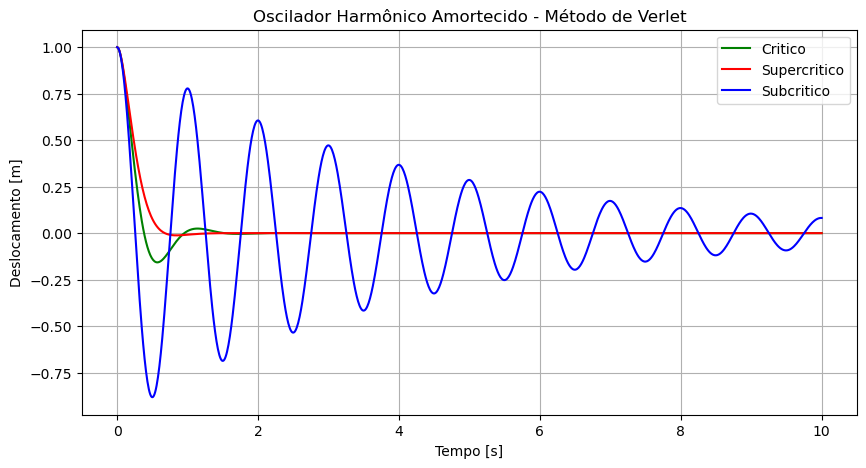

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# Carregando os dados
data = np.load('verlet-Subcritico.npz')
data1 = np.load('verlet-Critico.npz')
data2 = np.load('verlet-Supercritico.npz')
t1 = data1['t']
y1 = data1['y']
t2 = data2['t']
y2 = data2['y']
t = data['t']
y = data['y']

# Plotando os resultados
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t1, y1, label='Critico', color='green')
ax.plot(t2, y2, label='Supercritico', color='red')
ax.plot(t, y, label='Subcritico', color='blue')
ax.set_title('Oscilador Harmônico Amortecido - Método de Verlet')
ax.set_xlabel('Tempo [s]')
ax.set_ylabel('Deslocamento [m]')
ax.grid(True)
ax.legend()
plt.show()


## Vibrações na corda
Considere a equação de ondas:

${{∂²u} \over ∂t²} = c²{{∂²u} \over ∂x²}$ 

onde u ( x , t ) é a função de onda, c é a velocidade da onda, e x é a posição ao longo da corda. A equação acima é uma equação diferencial de condição de contorno (BVP = boundary value problem). Como condição de contorno, consideraremos que as duas pontas da corda estão presas: u ( 0 , t ) = 0 e u ( L , t ) = 0 , onde L é o comprimento da corda.

Neste exercício estaremos interessados apenas nos modos normais de vibração e não na evolução temporal da onda. Portanto, não precisamos de condição inicial.



### Atividades mínimas: 65 pts

- 3a. Considere o *ansatz*

$$
u(x, t) = \phi(x) e^{i \omega t}. 
$$ 

Substitua o *ansatz* na equação de ondas e obtenha a equação diferencial para $\phi(x)$. Note que ela toma a forma de uma equação de autovalores e autovetores. Obtenha as soluções analíticas.

- 3b. Use o método de diferenças finitas para expressar o operador $d^2/dx^2$ na forma de uma matriz tridiagonal (**veja as notas de aula do professor**). Para isso, considere uma grade de pontos igualmente espaçados $x_n = n \Delta x$, com $n=0, 1, \ldots, N-1$ e $\Delta x = L/(N-1)$. Com isso, você terá escrito a equação diferencial na forma $$A \phi = \lambda \phi,$$ onde $A$ é um matriz e $\lambda$ é o autovalor. Identifique corretamente a matriz $A$ e o autovalor $\lambda$ em termos dos parâmetros do problema.
